<h1><b>Projet Jupyter</b></h1>

<h2>support : Projet BARSTAR</h2>

<p>Le but du projet est d'étudier la dynamique moléculaire de la barstar afin de déterminer les regions possibles d'interaction. On se base sur les recherches de <b>Kimura and al.</b> qui décrivent l'interaction <b>Barnase-Barstar</b>
Pour celà, on fait notemment l'hypothèse que ces regions sont en périphérie de la proteine, et ont des residus mobiles. en effet, si un residu est mobile, il n'appartient vraissemblablement pas déjà dans une interaction, et est possiblement libre pour en créer une avec une autre proteine.
</p>
<img src="images/Barstar-barnase-1brs.png" width="300" height="300">

In [1]:
from mes_fonctions import *
import pylab, numpy
import math, string, sys, os
import matplotlib.pyplot as plt 

<h2>1)IMPORTATION des données</h2>
<p>On va charger deux fichiers pdb contenus dans le dossier /pdb.<br>
Le premier est le pdb de la proteine barstar de reference. le deuxième est un pdb contenant des conformations toutes les 10 ou 100 picosecondes.</p>

In [2]:
chemin=os.getcwd()
result=chemin+"/resultats"
barstar=chemin+"/pdb"
os.chdir(barstar)
dref=parsePDB("start_prot_only.pdb")
#dico=parsePDB("md_prot_only_skip10.pdb")
dico=parsePDB("md_prot_only_skip100.pdb")
os.chdir(chemin)

<h2>2)Analyse global de la dynamique</h2>
<p>Etude du <i>rayon de giration</i> et du RMSD globaux. Ils donnent une idée GLOBALE de la mobilité de la proteine.<br>
Ici le rayon de giration correspond à la distance entre le Centre de masse de la proteine et l'atome le plus éloigné.
<br>Le RMSD est une mesure de "distance" entre une conformation VS la reference.</p>

In [4]:
listeresidu=[]
for conf in dref["conformation"]:
	nb_resid=0
	CM_Conf(dref[conf])
	for res in dref[conf]["liste_resid"]:
		nb_resid+=1
		listeresidu.append(res)
		dist_ATOM_CM(dref[conf][res], dref[conf]["XCM"], dref[conf]["YCM"], dref[conf]["ZCM"])
	dref[conf]["rayon_giration"]=recherche_point_distant(dref[conf])
RG_ref=dref[conf]["rayon_giration"]

listeCONF=[] #on en profite pour recuperer la liste des conformations
nb_conf=0
for conf in dico["conformation"]:
	listeCONF.append(conf)
	nb_conf+=1
	CM_Conf(dico[conf]) #calcul centre de masse
	for res in dico[conf]["liste_resid"]: #va boucler sur les atomes et adresser a chacun, une distance par rapport au CM
		dist_ATOM_CM(dico[conf][res], dico[conf]["XCM"], dico[conf]["YCM"], dico[conf]["ZCM"]) #distance entre chaque atomes et CM
	dico[conf]["rayon_giration"]=recherche_point_distant(dico[conf])

<h4>A)RAYON DE GIRATION</h4>
<p>Pour les différents graphs, il est nécessaire de créer l'axe des abscisses : Pour l'étude globale il correspond aux conformations.<br>
L'axe des ordonnées correspond au rayon maximal de la proteine. la droite verte correspond quand à elle, au rayon de giration de la conformation de réference.</p>

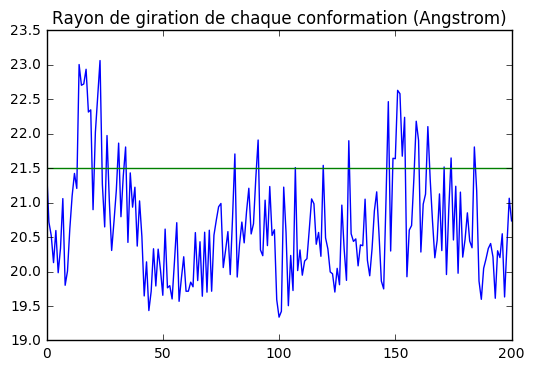

In [5]:
#axe des abscisses 
listex=range(len(listeCONF))
#axe des ordonnees : Rayon de giration
listeRG=[]
y1=[]
for conf in dico["conformation"]:
	listeRG.append(dico[conf]["rayon_giration"])
	y1.append(dref["0"]["rayon_giration"])
plt.plot(listex, listeRG)
plt.plot(listex,y1)
plt.title("Rayon de giration de chaque conformation (Angstrom)")
plt.show()

<h4>Analyse globales du Rayon de giration</h4>
<p>Le RG de reference est à 21.5 Angstoms. Sur la totalité des conformation, le RG est globalement compris entre 19.5 et 23 Angstroms.<br>En comparaison avec la reference, l'étude ne montre pas de différence très significative. A première vue, la proteine semble globalement stable.</p>

<h4>B)RMSD</h4>
<p>Qu'en est-il du RMSD global ? Il compare compare la position de chaque residu à son homologue de la conformation de reference. Il donne donc une idée de la mobilité globale de la proteine, par une "mesure de distance".</p>


In [6]:
RMSD_conf_global(dico,dref,listeresidu)

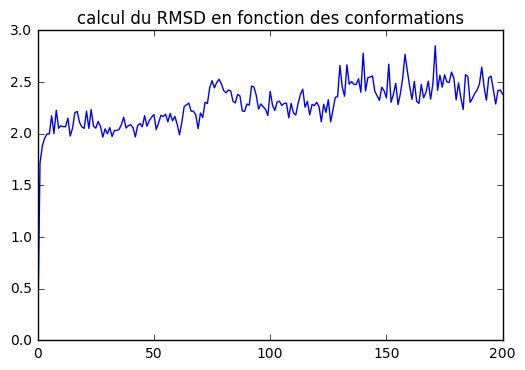

In [7]:
for conf in dico["conformation"]:
	for res in dico[conf]["liste_resid"]:
		RMSD_res_local(dico[conf][res],dref["0"][res])
		CM_Res(dico[conf][res])
		dist_RES_CM(dico[conf][res],dref["0"]["XCM"], dref["0"]["YCM"], dref["0"]["ZCM"])
#RMSD Global
listermsd=[]
for conf in dico["conformation"]:
	listermsd.append(dico[conf]["RMSD"])
plt.plot(listex, listermsd)
plt.title("calcul du RMSD en fonction des conformations")
plt.show()

<h4>Analyse globales du RMSD</h4>
<p>Les toutes premières conformations sont naturellement très proches de la conformation de reference cristalisée. leur distance "RMSD" est donc quasi-nulle. Pour les suivantes, leur RMSD est relativement faible entre 2 et 3 Angströms.</p>
<h3>Conclusion de l'étude globale</h3><p>La mesure du RMSD, couplée à celle du Rayon de gyration, montre une proteine globalement stable.</p>

<h2>3) Etude Locale :</h2><br>
<i>Les residus les plus mobiles sont-ils les plus eloignes</i>


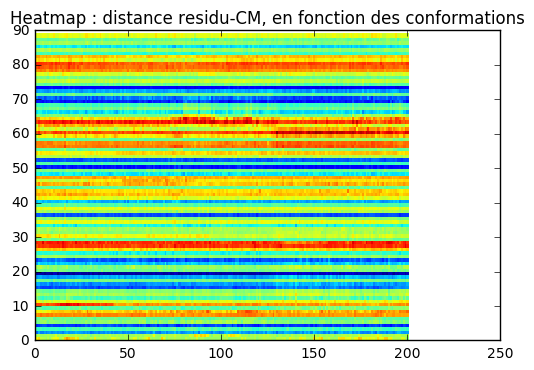

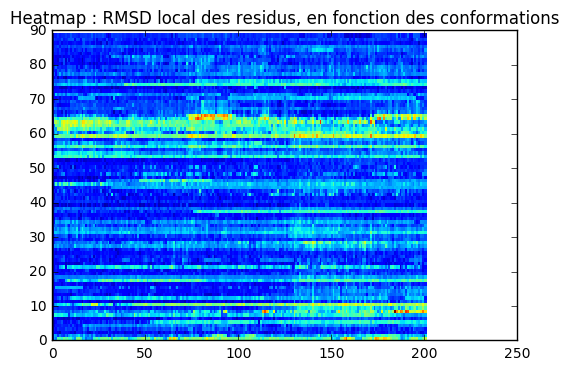

In [8]:
matrice_dist=numpy.zeros((nb_resid,nb_conf))
id1=0
for conf in dico["conformation"]:
	id2=0
	for res in dico[conf]["liste_resid"]:
		matrice_dist[id2][id1]=dico[conf][res]["dist_res_CM"]
		id2+=1
	id1+=1
pylab.pcolor(matrice_dist)
plt.title("Heatmap : distance residu-CM, en fonction des conformations")
plt.show()
os.chdir(result)
pylab.savefig("fig_dist.eps")
os.chdir(chemin)

matrice_mob=numpy.zeros((nb_resid,nb_conf))
id1=0
for conf in dico["conformation"]:
	id2=0
	for res in dico[conf]["liste_resid"]:
		matrice_mob[id2][id1]=dico[conf][res]["RMSDlocal"]
		id2+=1
	id1+=1
pylab.pcolor(matrice_mob)
plt.title("Heatmap : RMSD local des residus, en fonction des conformations")
plt.show()
os.chdir(result)
pylab.savefig("fig_mobil.eps")
os.chdir(chemin)



<h3>Première analyse locale</h3>
<p>Le premier heatmap montre la distance de chaque residu par rapport au CM. On constate tout d'abord que cette distance est constante au fils des conformations. l'analyse globale, faites préalablement, est donc confirmée. (On note qu'en ce qui concerne l'analyse locale qui sera faite plus tard, cette mesure de l'enfouissement ne sera pas bonne pour prédire une conformation optimale).
Ce heatmap montre également en rouge, les residus qui sont les plus éloignés du Centre de masse. on identifie ainsi différentes régions. Ces regions sont interessantes car ce sont celles plutôt en périphérie de la proteine, et donc ayant le plus de chance de jouées un rôle dans une interaction proteine-proteine.</p>
<p>Le deuxième Heatmap montre la mobilité de chaque residu, selon les conformations. On constate encore une fois que la grande majorité des residus sont globalement immobile. Cependant, On identifie certains residus, ou groupes de residus, mobilent, pendant une periode donnée.</p><br>
En combinant les deux heatmaps, on constate plusieurs choses interessantes :<br>
<p>-La région des residus <b>76-80</b> est une région éloignée, mais peu mobile dans le temps observé : seul le residu 76 a une légère mobilité intéressante. Si elle participe à une interaction protéine-protéine, est-ce que son action est annexe en apportant une "stabilité" de structure ? ou bien autre ?<br>
-On peut supposer la même chose avec les residus de <b>27 à 30</b>, bien qu'ils soient très légèrement plus mobile.<br>
-La region <b>58-65</b> est quant à elle, très mobile par rapport au reste de la protéine Barstar, et éloignée du centre de masse.<br>
-Les residus <b>8,9, 10</b>, sont interessants : ce ne sont pas les residus les plus eloignés du CM, mais semblent tout de même exposés. En effet pour certaines conformations, ils ont une mobilité notablement suppérieur. En comparaison, les residus 42-43-44-46-47, qui sont à une distance semblables, possède une mobilité très faible.<br></p>


<h2>4) Les informations de l'article de Kimura & al :</h2>
<p>L'article de kimura & al, s'intéresse à l'interaction <b>Barnase-Barstar</b>. Deux residus de la Barnase sont particulièrement étudiée : asp39 et glu76 qui semblent interagir avec des residus de la Barnase.</p>
<table>
    <tr>
        <td>
            <img src="images/figure1.png">
        </td>
        <td>
            <img src="images/view_pymol.png">
        </td>
    </tr>
</table>
<p>Lorsque l'on regarde le heatmap des RMSD de ces 2 résidus, ça se semble pas abhérant. Ce ne sont pas les plus mobiles, ni les plus loin du centre de masse, mais sur la capture de logiciel Pymol, ils sont relativement bien exposés et libre d'interaction. </p>
<p>Le heatmap montre une information supplémentaire : ces deux residus n'ont pas une mobilité constante dans le temps. On se doute qu'il existe des conformations plus propice à ce qu'ils participent à une intéraction. Une étude plus en détail du RMSD et de la distance au centre de masse, pour ces deux résidus, peut s'avérer une information capitale pour déterminer 1) quelle conformation est la plus probable, et lors de cette conformation, si d'autres residus peuvent participer à l'intéraction proteine-proteine. Et si c'est le cas, qu'elle est leurs actions.
</p>

<h2>Etude des residus Glu76 et Asp39</h2>
<h4>Exposition au cours des conformations</h4>

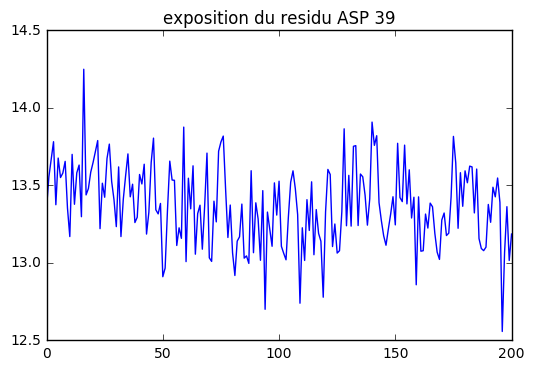

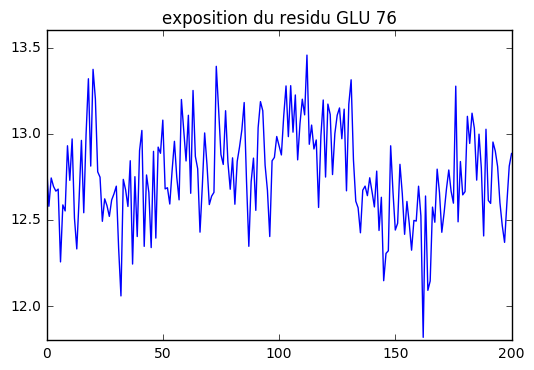

In [9]:
liste39res_CM=[]
liste76res_CM=[]
for conf in dico["conformation"]:
	liste39res_CM.append(dico[conf]["39"]["dist_res_CM"])
	liste76res_CM.append(dico[conf]["76"]["dist_res_CM"])
#axe Y : Distance ASP 39 - CM
plt.plot(listex,liste39res_CM)
plt.title("exposition du residu ASP 39")
plt.show()
#axe Y : Distance GLU 76 - CM
plt.plot(listex,liste76res_CM)
plt.title("exposition du residu GLU 76")
plt.show()

La distance au CM des deux résidus ne varie pas de façon très significative au cours des conformations (comme il avait été dit dans la première partie). Cette mesure de l'enfouissement n'est donc pas déterminante pour la séléction d'une conformation. Cependant, elle peut confirmer le choix de ces deux résidus. En effet, la variation de leur distance au CM est faible. La moyene est donc significativement représentative. Or lorsque l'on compare leur moyenne, à celles des autres résidus, ils sont clairement dans la partie haute ( residus plutôt exposés ).

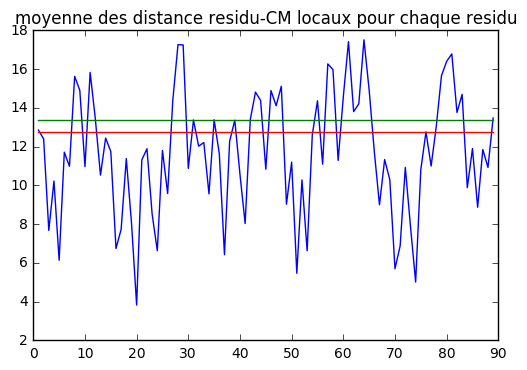

In [10]:
listeMOYdistres=[]
for res in listeresidu:
	MOYdistres=0.0
	for conf in dico["conformation"]:
		MOYdistres+=dico[conf][res]["dist_res_CM"]
	MOYdistres=MOYdistres/nb_conf
	listeMOYdistres.append(MOYdistres)
y39=[]
y76=[]
for res in listeresidu :
    y39.append(listeMOYdistres[38]) #attention les residus ne sont pas bien indexes dans la liste : n-1
    y76.append(listeMOYdistres[75])
plt.plot(listeresidu,listeMOYdistres)
plt.plot(listeresidu,y39)
plt.plot(listeresidu,y76)
plt.title("moyenne des distance residu-CM locaux pour chaque residu")
plt.show()

<h4>RMSD des residus 76 et 39</h4>

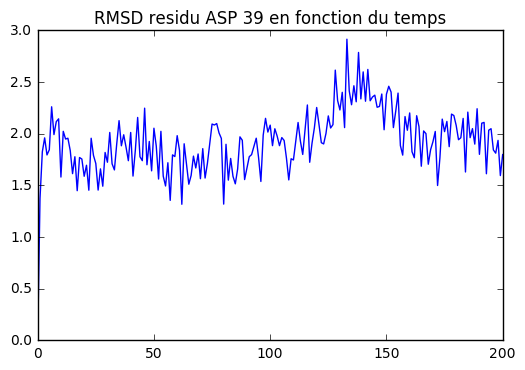

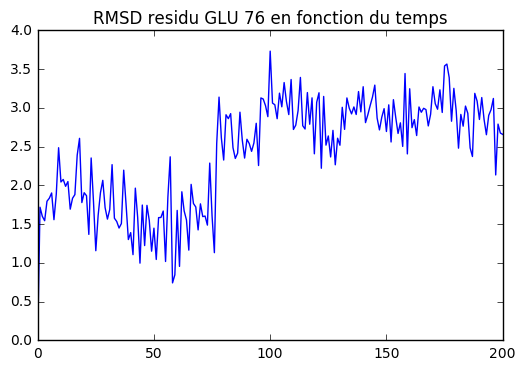

In [9]:
listeRMSD39=[]
listeRMSD76=[]
for conf in dico["conformation"]:
	listeRMSD39.append(dico[conf]["39"]["RMSDlocal"])
	listeRMSD76.append(dico[conf]["76"]["RMSDlocal"])
plt.plot(listeCONF,listeRMSD39)
plt.title("RMSD residu ASP 39 en fonction du temps")
plt.show()
plt.plot(listeCONF,listeRMSD76)
plt.title("RMSD residu GLU 76 en fonction du temps")
plt.show()

<p>Ces graphs montrent le RMSD des residus 39 et 76 au cours des conformations. Cette mesure est plus variable que le rayon de giration, au cours des conformations : une mesure haute signifierait que le residu en question est libre d'interaction lors de la conformation observée. Or à partir des conformations 70, le résidu 76 à un RMSD qui double quasiment. Concernant le résidu 39, il semble que cette tendance soit plus marquée vers les conformations 130 - 160.</p>

<p>la visualisation sous Pymol montre une bonne exposition des régions hydrophobes des residus considérés. il semblerait que certains gros résidus comme la TRP38, bloque une bonne accessibilité. au contraire, le Glu80 et Asp35 soit positionnés correctement pour participer à l'interaction.</p>
<table>
    <td>
        <img src="images/barstar_confo77.png">
    </td>
</table>
<p>Cette confo 77 semble plutot acceptable pour accueillir une interaction.
</p>

<h2>Conclusion</h2>
<p>Grâce à la visualisation sous Pymol, aux données scientifiques connues, et aux calculs de certaines mesures, il a été possible de prédire, non seulement un lieu possible d'interaction de la barstar, mais également le moment de l'interaction. moment où les contraintes physiques et chimiques sont les plus favorables.</p>